## Import Python Libraries and Data Sets

In [1]:
!pip install autograd-1.7.0-py3-none-any.whl
!pip install autograd-gamma-0.5.0.tar.gz
!pip install interface_meta-1.3.0-py3-none-any.whl
!pip install formulaic-1.1.1-py3-none-any.whl
!pip install lifelines-0.30.0-py3-none-any.whl

Processing ./autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing ./autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=3ceedb89559bf902928e414849e4cb5a964bad989b1bf683bd2edbb1894b23f9
  Stored in directory: /Users/conorshanahan/Library/Caches/pip/wheels/db/77/30/509982d9aabdecf5fab69523039179d2bc8078da7bb547de66
Successfully built autograd-gamma
  Attempting uninstall: autograd-gamma
    Found existing installation: autograd-gamma 0.5.0
    Uninstalling autograd-gamma-0.5.0:
      Successfully uninstalled autograd-gamma-0.5.0
Processing ./interface_meta-1.3.0-py3-none-any.whl
interface-meta is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing ./formulaic-1.1.1-py

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

traindf = pd.read_csv('train.csv')
print('The size of the training data frame is:', traindf.shape)

testdf = pd.read_csv('test.csv')
print('The size of the testing data frame is:', testdf.shape)

traindf.head()

The size of the training data frame is: (28800, 60)
The size of the testing data frame is: (3, 58)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [7]:
from lifelines import KaplanMeierFitter

In [9]:
from lifelines.utils import concordance_index

In [11]:
def calculate_survival_prob(df, time_col, event_col):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_col], df[event_col])
    return kmf.survival_function_at_times(df[time_col]).values

def preprocess_survival_data(df, time_col='efs_time', event_col='efs'):
    df['target'] = calculate_survival_prob(df, time_col, event_col)
    df.loc[df[event_col] == 0, 'target'] -= 0.2  # Adjust for censored data
    # df['efs_time2'] = df[time_col].where(df[event_col] == 1, -df[time_col])  # Negative for censored
    return df

traindf = preprocess_survival_data(traindf)
traindf.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,target
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0.258687
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0.847759
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0.262424
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0.256661
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0.264674


# EDA

## EDA On Target Variable(s)

In this case we have to main target variables, `efs` and `efs_time`. `efs` is a binary variable where a value of 1 means the patient did not survive and their`efs_time` value is associated with their time of death. A value of 0 means that no event has been reported but it is unclear if the patient survived, however, the patient survived at least as long as their reported `efs_time`.

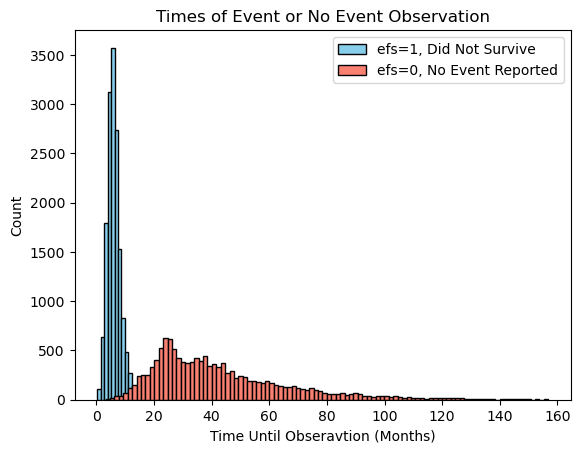

In [18]:
plt.hist(traindf.loc[traindf['efs']==1, 'efs_time'], bins=100, edgecolor='black', color='skyblue', label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'efs_time'], bins=100, edgecolor='black', color='salmon', label='efs=0, No Event Reported')
plt.xlabel('Time Until Obseravtion (Months)')
plt.ylabel('Count')
plt.title('Times of Event or No Event Observation')
plt.legend()
plt.show()

## Target Variable Transformation
Combine `efs` and `efs_time` to make a new target variable which is a function of both.

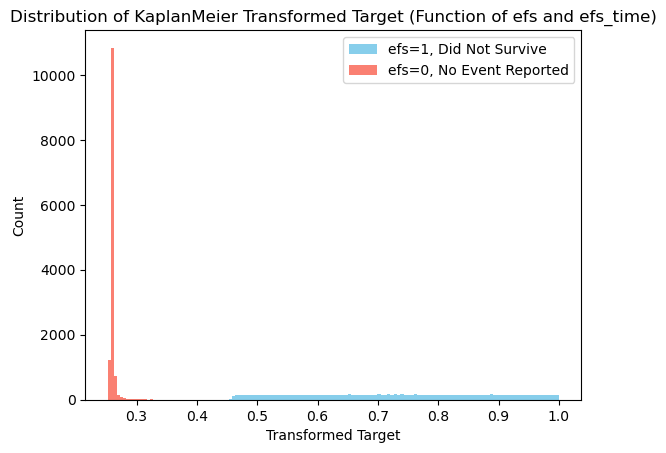

In [20]:
# traindf['y'] = traindf['efs_time'].values
# mx = traindf.loc[traindf['efs']==1, 'efs_time'].max()
# mn = traindf.loc[traindf['efs']==0, 'efs_time'].min()
# traindf.loc[traindf['efs']==0, 'y'] = traindf.loc[traindf['efs']==0, 'y'] + mx - mn
# traindf['y'] = traindf['y'].rank()
# traindf.loc[traindf['efs']==0, 'y'] += len(traindf)//2
# traindf['y'] = traindf['y']/traindf['y'].max()

plt.hist(traindf.loc[traindf['efs']==1, 'target'], bins=100, color='skyblue', label="efs=1, Did Not Survive")
plt.hist(traindf.loc[traindf['efs']==0, 'target'], bins=100, color='salmon', label='efs=0, No Event Reported')
plt.xlabel('Transformed Target')
plt.ylabel('Count')
plt.title('Distribution of KaplanMeier Transformed Target (Function of efs and efs_time)')
plt.legend()
plt.show()

## EDA on Features
First remove traget variables and other irrelevant variables to isolate the features that will be used with the model. Next, split the isolated features into categorical and numeric. Then, explore the different numerical features with histograms and box plots.

In [24]:
RMV = ['ID', 'efs', 'efs_time','target']
features = [c for c in traindf.columns if c not in RMV]
print(f'There are {len(features)} features. They are the following: \n{features}')

There are 57 features. They are the following: 
['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [26]:
CATVARS = []
for c in features:
    if traindf[c].dtype == 'object':
        CATVARS.append(c)
        traindf[c] = traindf[c].fillna('NAN')
        testdf[c] = testdf[c].fillna('NAN')
print(f'There are {len(CATVARS)} categorical variables. They are the following: \n{CATVARS}')

There are 35 categorical variables. They are the following: 
['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [28]:
NUMVARS = [c for c in features if c not in CATVARS]
print(f'There are {len(NUMVARS)} numeric variables. They are the following: \n{NUMVARS}')

There are 22 numeric variables. They are the following: 
['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10']


In [30]:
import seaborn as sns

plots_per_row = 2

num_vars = len(NUMVARS)
num_rows = int(np.ceil(num_vars/plots_per_row))

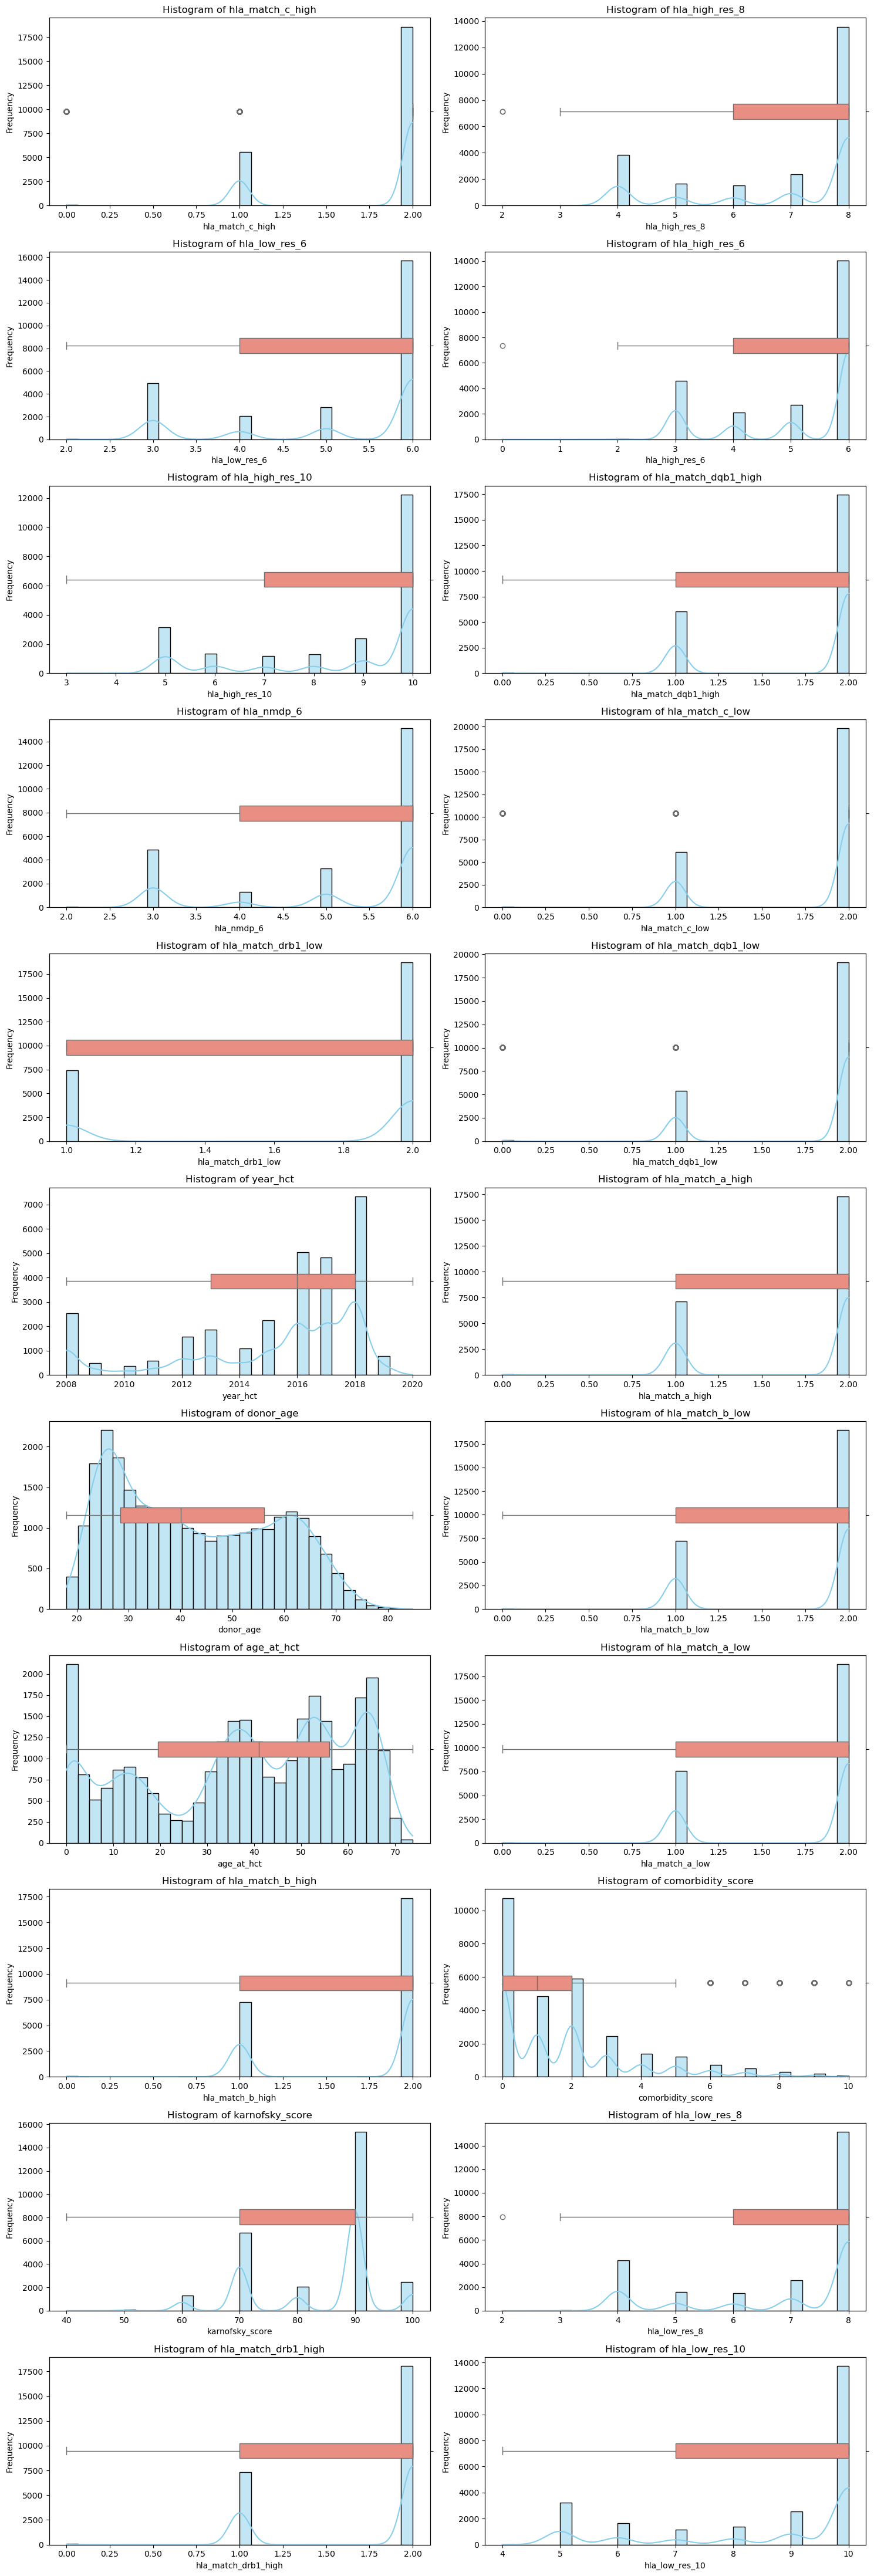

In [36]:
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15,4*num_rows))

if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)

axes = axes.ravel()

for i, column in enumerate(NUMVARS):
    sns.histplot(traindf[column], ax=axes[i], bins=30, kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_ylabel('Frequency')

    ax_twin=axes[i].twinx()
    sns.boxplot(x=traindf[column], ax=ax_twin, color='salmon')
    ax_twin.set(ylim=(-5,5))

plt.tight_layout()
plt.show()

**From the above plots, we can see that majority of the numeric variables have a limited number of potential values.**

## Label Encode Categorical Features

In [38]:
combineddf = pd.concat([traindf, testdf], axis=0, ignore_index=False)

for c in features:
    if c in CATVARS:
        print(f"{c}, ",end="")
        combineddf[c],_ = combineddf[c].factorize()
        combineddf[c] -= combineddf[c].min()
        combineddf[c] = combineddf[c].astype('int32')
        combineddf[c] = combineddf[c].astype('category')

    else:
        if combineddf[c].dtype=='float64':
            combineddf[c] = combineddf[c].astype('float32')
        if combineddf[c].dtype=='int64':
            combineddf[c] = combineddf[c].astype('int32')

traindf = combineddf.iloc[:len(traindf)].copy()
testdf = combineddf.iloc[:len(testdf)].reset_index(drop=True).copy()

dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

In [42]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBClassifier
import xgboost

In [98]:
%%time
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb=np.zeros(len(traindf))
pred_xgb = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'target']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'target']
    x_test = testdf[features].copy()

    model_xgb = XGBRegressor(
        device='cuda',
        max_depth=3,
        colsample_bytree=0.5,
        subsample=0.8,
        n_estimators=2000,
        learning_rate=0.02,
        #eval_metric='cox-nloglik',
        #early_stopping_rounds=100,
        #objective='survival:cox',
        enable_categorical=True,
        min_child_weight=80
    )

    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=500
    )

    oof_xgb[testdf_index] = model_xgb.predict(x_valid)
    pred_xgb += model_xgb.predict(x_test)
    y_pred = model_xgb.predict(x_valid)

    c_index = concordance_index(y_valid, y_pred)
    print(f'The concordance index is: {c_index}')

pred_xgb /= FOLDS

#########################
### Fold 1
#########################
[0]	validation_0-rmse:0.26210
[500]	validation_0-rmse:0.23688
[1000]	validation_0-rmse:0.23429
[1500]	validation_0-rmse:0.23338
[1999]	validation_0-rmse:0.23285
The concordance index is: 0.6485237226623642
#########################
### Fold 2
#########################
[0]	validation_0-rmse:0.25746
[500]	validation_0-rmse:0.23132
[1000]	validation_0-rmse:0.22925
[1500]	validation_0-rmse:0.22832
[1999]	validation_0-rmse:0.22788
The concordance index is: 0.6500347299801783
#########################
### Fold 3
#########################
[0]	validation_0-rmse:0.26043
[500]	validation_0-rmse:0.23317
[1000]	validation_0-rmse:0.23131
[1500]	validation_0-rmse:0.23061
[1999]	validation_0-rmse:0.23039
The concordance index is: 0.6522499565786134
#########################
### Fold 4
#########################
[0]	validation_0-rmse:0.26234
[500]	validation_0-rmse:0.23544
[1000]	validation_0-rmse:0.23330
[1500]	validation_0-rmse:0.23243
[1

In [100]:
import import_ipynb
from metric import score

In [102]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = oof_xgb
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for XGBoost = {m}')

Overall CV for XGBoost = 0.6772497822030448


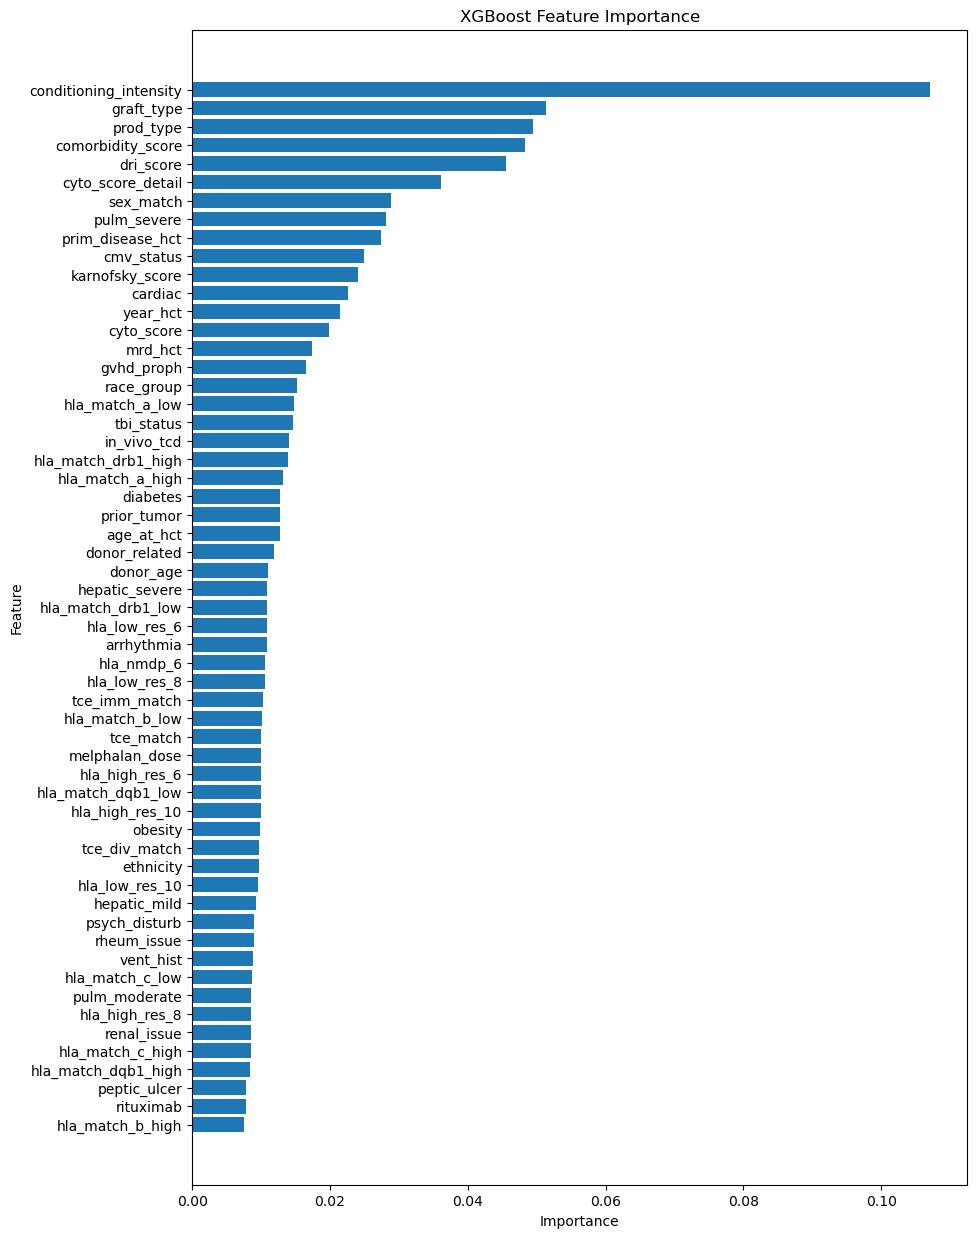

In [104]:
feature_importance = model_xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [58]:
# w_features = []
# worst_features = importance_df[importance_df['Importance'] < 0.013]
# worst_features.Feature

In [60]:
# RMV = ['hla_match_b_high', 'hla_high_res_8', 'hla_match_dqb1_high', 'obesity', 'hepatic_mild', 'hla_match_dqb1_low', 'peptic_ulcer', 'hla_match_b_low', 'pulm_moderate', 'psych_disturb', 'vent_hist', 'hla_low_res_10', 'hla_match_c_high', 'melphalan_dose', 'ID', 'efs', 'efs_time','target']
# features = [c for c in traindf.columns if c not in RMV]
# print(f'There are {len(features)} features. They are the following: \n{features}')

In [62]:
# %%time
# FOLDS = 5
# kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

# oof_xgb=np.zeros(len(traindf))
# pred_xgb = np.zeros(len(testdf))

# for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
#     print('#' *25)
#     print(f'### Fold {i+1}')
#     print('#' *25)

#     x_train = traindf2.loc[traindf_index, features].copy()
#     y_train = traindf2.loc[traindf_index, 'target']
#     x_valid = traindf2.loc[testdf_index, features].copy()
#     y_valid = traindf2.loc[testdf_index, 'target']
#     x_test = testdf[features].copy()

#     model_xgb = XGBRegressor(
#         device='cuda',
#         max_depth=4,
#         colsample_bytree=0.5,
#         subsample=0.8,
#         n_estimators=10_000,
#         learning_rate=0.05,
#         eval_metric='cox-nloglik',
#         early_stopping_rounds=100,
#         objective='survival:cox',
#         enable_categorical=True,
#         min_child_weight=4
#     )

#     model_xgb.fit(
#         x_train, y_train,
#         eval_set=[(x_valid, y_valid)],
#         verbose=50
#     )

#     oof_xgb[testdf_index] = model_xgb.predict(x_valid)
#     pred_xgb += model_xgb.predict(x_test)
#     y_pred = model_xgb.predict(x_valid)

#     c_index = concordance_index(y_valid, y_pred)
#     print(f'The concordance index is: {c_index}')

# pred_xgb /= FOLDS

In [64]:
# y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
# y_pred = traindf[['ID']].copy()
# y_pred['prediction'] = -oof_xgb
# m = score(y_true.copy(), y_pred.copy(), 'ID')
# print(f'Overall CV for XGBoost = {m}')

In [66]:
# feature_importance = model_xgb.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': feature_importance
# }).sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(10,15))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('XGBoost Feature Importance')
# plt.gca().invert_yaxis()
# plt.show()

In [68]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

In [72]:
%%time
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_cat=np.zeros(len(traindf))
pred_cat = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'target']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'target']
    x_test = testdf[features].copy()

    train_pool = Pool(x_train, y_train, cat_features = CATVARS)
    val_pool = Pool(x_valid, y_valid, cat_features = CATVARS)

    model_cat = CatBoostRegressor(
        # iterations = 1000,
        # depth=6,
        # learning_rate=0.05,
        # loss_function='RMSE',
        # random_seed=42,
        # verbose=100,
        # l2_leaf_reg=3,
        learning_rate=0.1,
        grow_policy = 'Lossguide'
    )

    model_cat.fit(
        train_pool,
        eval_set= (val_pool),
        early_stopping_rounds=100,
        verbose=50
    )

    oof_cat[testdf_index] = model_cat.predict(x_valid)
    pred_cat += model_cat.predict(x_test)

    y_pred_mod = model_cat.predict(x_valid)
    c_index = concordance_index(y_valid, y_pred_mod)
    print(f'The concordance index is: {c_index}')

pred_cat /= FOLDS

#########################
### Fold 1
#########################
0:	learn: 0.2576109	test: 0.2572744	best: 0.2572744 (0)	total: 107ms	remaining: 1m 46s
50:	learn: 0.2339172	test: 0.2364525	best: 0.2364525 (50)	total: 1.81s	remaining: 33.8s
100:	learn: 0.2289864	test: 0.2341226	best: 0.2341130 (99)	total: 3.35s	remaining: 29.8s
150:	learn: 0.2245207	test: 0.2331403	best: 0.2331133 (148)	total: 4.92s	remaining: 27.7s
200:	learn: 0.2217543	test: 0.2326034	best: 0.2326034 (200)	total: 6.42s	remaining: 25.5s
250:	learn: 0.2186605	test: 0.2321571	best: 0.2321441 (243)	total: 7.94s	remaining: 23.7s
300:	learn: 0.2160620	test: 0.2319753	best: 0.2319292 (292)	total: 9.48s	remaining: 22s
350:	learn: 0.2142140	test: 0.2319390	best: 0.2319290 (344)	total: 10.9s	remaining: 20.1s
400:	learn: 0.2121056	test: 0.2318865	best: 0.2318865 (400)	total: 12.8s	remaining: 19.2s
450:	learn: 0.2108194	test: 0.2318295	best: 0.2318135 (426)	total: 15s	remaining: 18.3s
500:	learn: 0.2090562	test: 0.2317277	best: 0.2

In [78]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = oof_cat
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for CatBoost = {m}')

Overall CV for CatBoost = 0.676035547231983


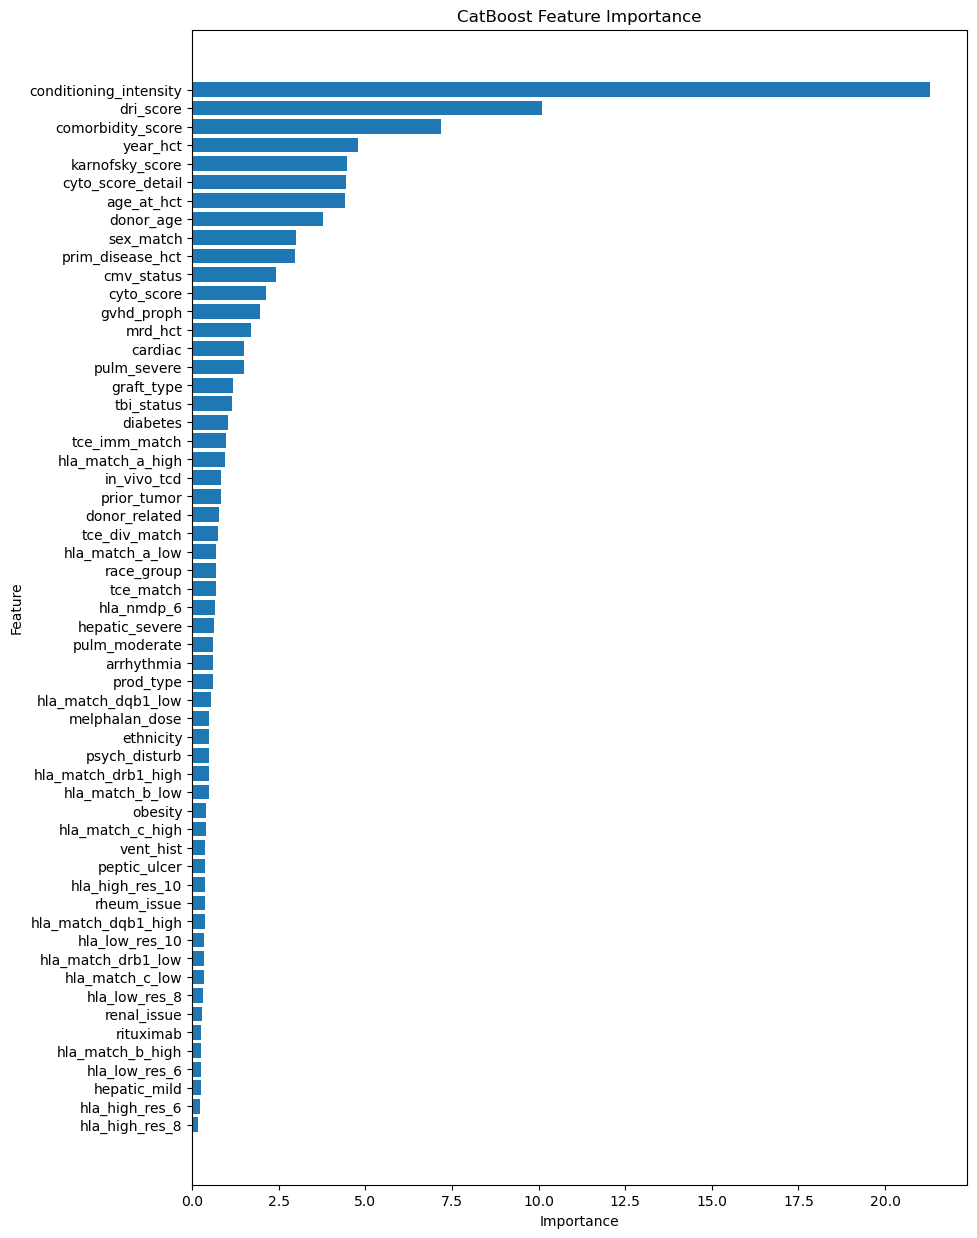

In [80]:
feature_importance = model_cat.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [92]:
traindf['efs_time2'] = traindf.efs_time.copy()
traindf.loc[traindf.efs==0, 'efs_time2'] *= -1

In [168]:
%%time
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb_cox=np.zeros(len(traindf))
pred_xgb_cox = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'efs_time2']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'efs_time2']
    x_test = testdf[features].copy()

    model_xgb_cox = XGBRegressor(
        device='cuda',
        max_depth=3,
        colsample_bytree=0.5,
        subsample=0.8,
        n_estimators=2000,
        learning_rate=0.02,
        eval_metric='cox-nloglik',
        #early_stopping_rounds=100,
        objective='survival:cox',
        enable_categorical=True,
        min_child_weight=80
    )

    model_xgb_cox.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=500
    )

    oof_xgb_cox[testdf_index] = model_xgb_cox.predict(x_valid)
    pred_xgb_cox += model_xgb_cox.predict(x_test)
    y_pred = model_xgb_cox.predict(x_valid)

    c_index = concordance_index(y_valid, y_pred)
    print(f'The concordance index is: {c_index}')

pred_xgb_cox /= FOLDS

#########################
### Fold 1
#########################
[0]	validation_0-cox-nloglik:7.62455
[500]	validation_0-cox-nloglik:7.43419
[1000]	validation_0-cox-nloglik:7.41700
[1500]	validation_0-cox-nloglik:7.41260
[1999]	validation_0-cox-nloglik:7.40863
The concordance index is: 0.5940528428740661
#########################
### Fold 2
#########################
[0]	validation_0-cox-nloglik:7.61798
[500]	validation_0-cox-nloglik:7.41190
[1000]	validation_0-cox-nloglik:7.39735
[1500]	validation_0-cox-nloglik:7.39155
[1999]	validation_0-cox-nloglik:7.38825
The concordance index is: 0.6032653190203199
#########################
### Fold 3
#########################
[0]	validation_0-cox-nloglik:7.61064
[500]	validation_0-cox-nloglik:7.40375
[1000]	validation_0-cox-nloglik:7.39025
[1500]	validation_0-cox-nloglik:7.38585
[1999]	validation_0-cox-nloglik:7.38475
The concordance index is: 0.5907973727179594
#########################
### Fold 4
#########################
[0]	validation_0-cox-nlog

In [170]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = oof_xgb_cox
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for XGBoost = {m}')

Overall CV for XGBoost = 0.672358796935966


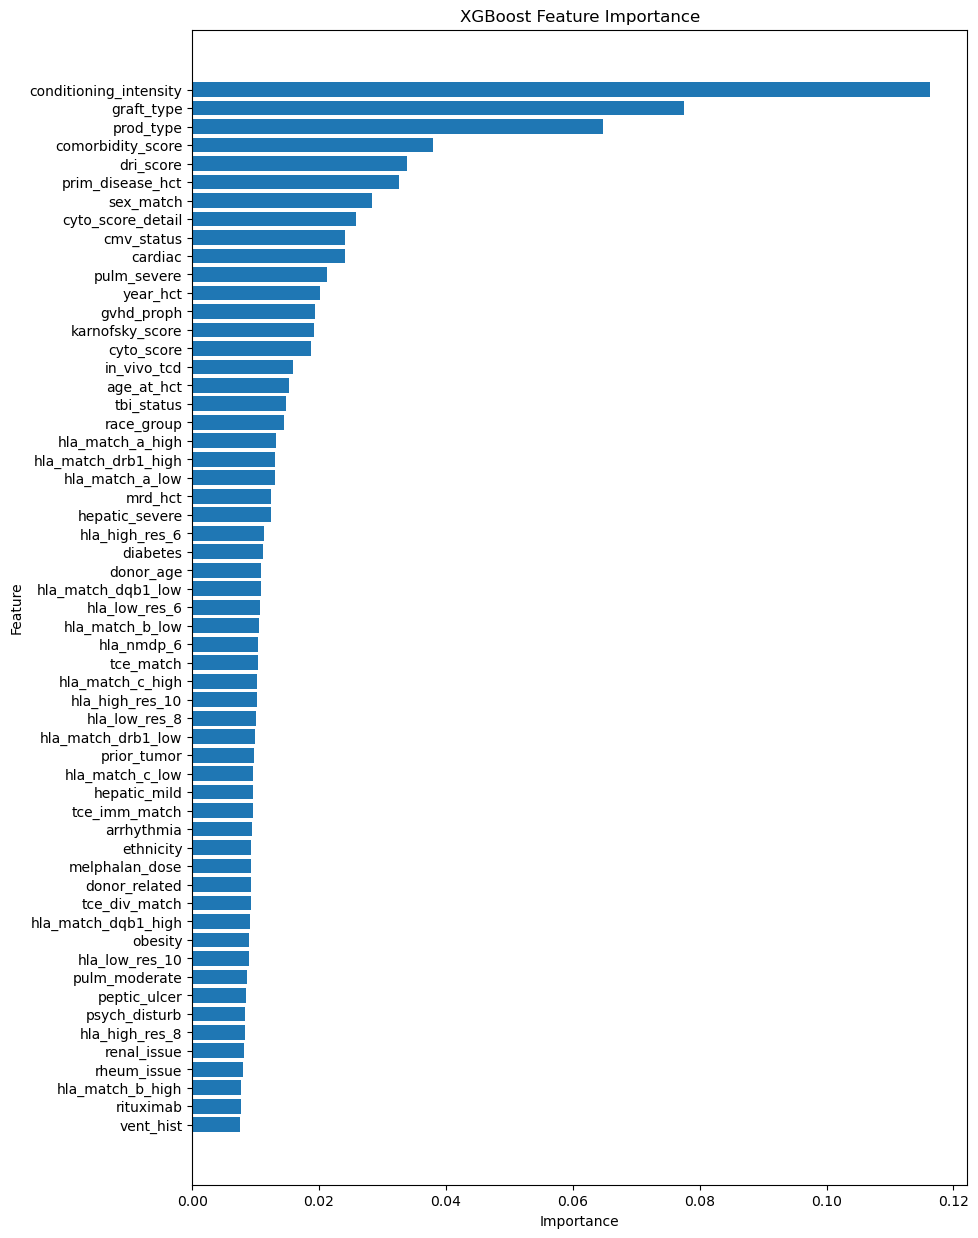

In [172]:
feature_importance = model_xgb_cox.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [142]:
%%time
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_cat_cox = np.zeros(len(traindf))
pred_cat_cox = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'efs_time2']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'efs_time2']
    x_test = testdf[features].copy()

    # train_pool = Pool(x_train, y_train, cat_features = CATVARS)
    # val_pool = Pool(x_valid, y_valid, cat_features = CATVARS)

    model_cat_cox = CatBoostRegressor(
        loss_function = 'Cox',
        learning_rate=0.1,
        grow_policy = 'Lossguide',
        iterations = 400,
        use_best_model = False,
        subsample = 0.99
    )

    model_cat_cox.fit(x_train, y_train,
        eval_set= (x_valid, y_valid),
        cat_features = CATVARS,
        verbose=100
    )

    oof_cat_cox[testdf_index] = model_cat_cox.predict(x_valid)
    pred_cat_cox += model_cat_cox.predict(x_test)

    y_pred_mod = model_cat_cox.predict(x_valid)
    c_index = concordance_index(y_valid, y_pred_mod)
    print(f'The concordance index is: {c_index}')

pred_cat_cox /= FOLDS

#########################
### Fold 1
#########################
0:	learn: 137490.5534093	test: 11655.4401677	best: 11655.4401677 (0)	total: 64.3ms	remaining: 25.7s


CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/private/libs/algo/tensor_search_helpers.cpp:554: Too few sampling units (subsample=0.99, bootstrap_type=MVS): please increase sampling rate or disable sampling

In [146]:
!pip install lightgbm

from lightgbm import LGBMRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.4 MB/s eta 0:00:00a 0:00:01


In [164]:
%%time
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(traindf))
pred_lgb = np.zeros(len(testdf))

for i, (traindf_index, testdf_index) in enumerate(kf.split(traindf)):
    print('#' *25)
    print(f'### Fold {i+1}')
    print('#' *25)

    x_train = traindf.loc[traindf_index, features].copy()
    y_train = traindf.loc[traindf_index, 'efs_time2']
    x_valid = traindf.loc[testdf_index, features].copy()
    y_valid = traindf.loc[testdf_index, 'efs_time2']
    x_test = testdf[features].copy()

    # train_pool = Pool(x_train, y_train, cat_features = CATVARS)
    # val_pool = Pool(x_valid, y_valid, cat_features = CATVARS)

    model_lgb = LGBMRegressor(
        max_depth = 3,
        colsample_bytree=0.4,
        n_estimators=2500,
        learning_rate=0.02,
        objective='regression',
        verbose=-1
    )

    model_lgb.fit(x_train, y_train,
        eval_set= (x_valid, y_valid),
    )

    oof_lgb[testdf_index] = model_lgb.predict(x_valid)
    pred_lgb += model_lgb.predict(x_test)

    y_pred_mod = model_lgb.predict(x_valid)
    c_index = concordance_index(y_valid, y_pred_mod)
    print(f'The concordance index is: {c_index}')

pred_lgb /= FOLDS

#########################
### Fold 1
#########################
The concordance index is: 0.607131494006553
#########################
### Fold 2
#########################
The concordance index is: 0.6216304619984862
#########################
### Fold 3
#########################
The concordance index is: 0.6017150326721709
#########################
### Fold 4
#########################
The concordance index is: 0.5951455755637511
#########################
### Fold 5
#########################
The concordance index is: 0.6181221623514871
#########################
### Fold 6
#########################
The concordance index is: 0.6167707772496667
#########################
### Fold 7
#########################
The concordance index is: 0.6155883715830966
#########################
### Fold 8
#########################
The concordance index is: 0.609921598463135
#########################
### Fold 9
#########################
The concordance index is: 0.6020687953326912
#########################
### 

In [166]:
y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = oof_lgb
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for LightGBM = {m}')

Overall CV for LightGBM = 0.6180746744909746


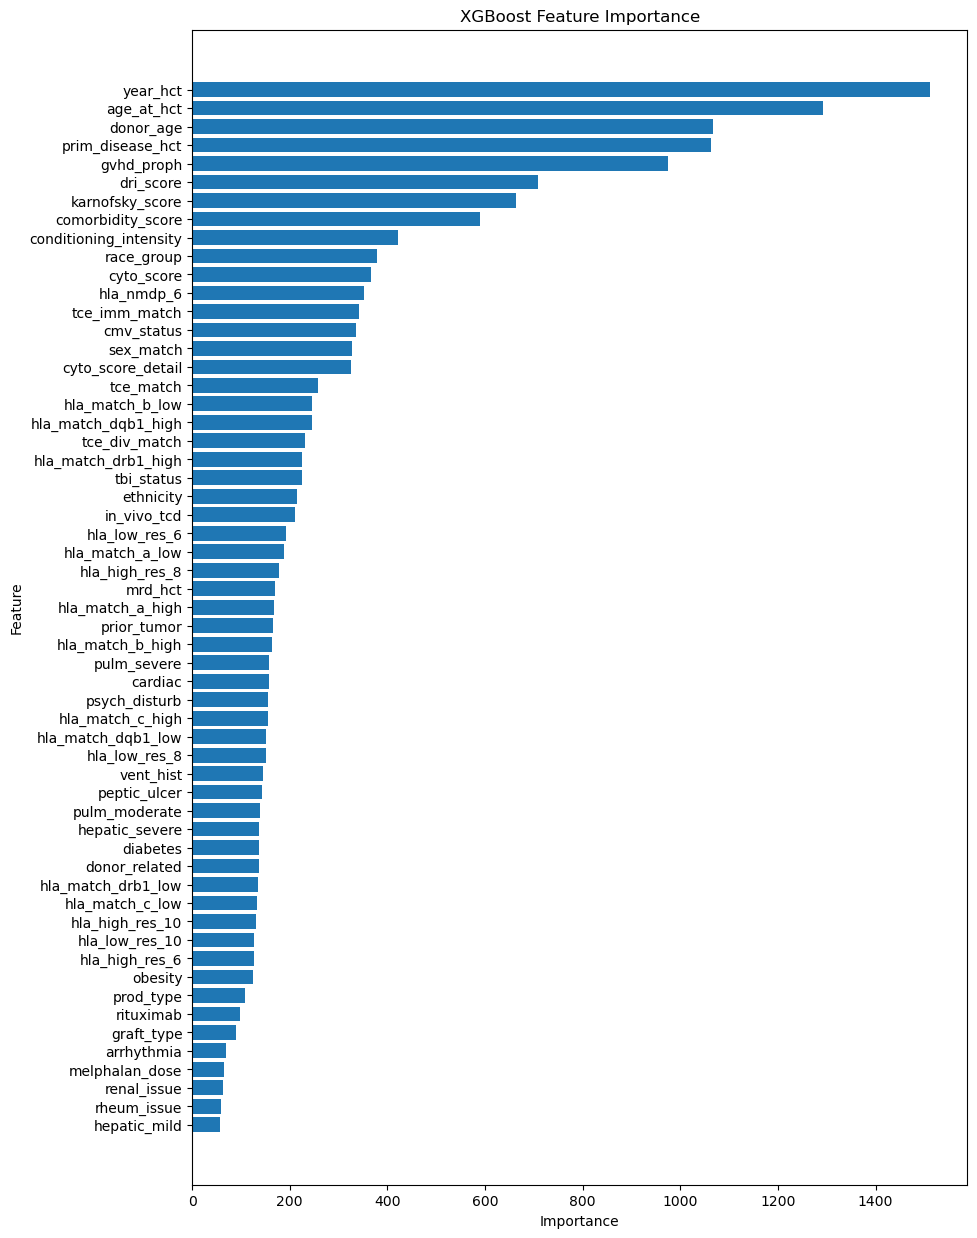

In [156]:
feature_importance = model_lgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [174]:
from scipy.stats import rankdata

y_true = traindf[['ID', 'efs', 'efs_time', 'race_group']].copy()
y_pred = traindf[['ID']].copy()
y_pred['prediction'] = rankdata(oof_xgb) + rankdata(oof_cat) + rankdata(oof_xgb_cox) 
m = score(y_true.copy(), y_pred.copy(), 'ID')
print(f'Overall CV for Ensemble = {m}')
y_pred

Overall CV for Ensemble = 0.6779567022538548


,ID,prediction
0,0,4922.0
1,1,59640.5
2,2,188.0
3,3,69538.0
4,4,41543.0
...,...,...
28795,28795,13193.0
28796,28796,75206.0
28797,28797,71527.0
28798,28798,18243.0


In [176]:
sub = pd.read_csv("sample_submission.csv")
sub.prediction = rankdata(pred_xgb) + rankdata(pred_cat) + rankdata(pred_xgb_cox) + rankdata(pred_lgb)
sub.to_csv("submission.csv",index=False)
print("Sub shape:",sub.shape)
sub.head()

Sub shape: (3, 2)


,ID,prediction
0,28800,7.0
1,28801,11.0
2,28802,6.0
